### Data Science Game 2017

Data fields

    media_id - identifiant of the song listened by the user
    album_id - identifiant of the album of the song
    media_duration - duration of the song
    user_gender -  gender of the user
    user_id -  anonymized id of the user
    context_type - type of content where the song was listened: playlist, album ...
    release_date - release date of the song with the format YYYYMMDD
    ts_listen - timestamp of the listening in UNIX time
    platform_name - type of os
    platform_family - type of device
    user_age - age of the user
    listen_type - if the songs was listened in a flow or not
    artist_id - identifiant of the artist of the song
    genre_id - identifiant of the genre of the song
    is_listened - 1 if the track was listened, 0 otherwise


In [23]:
import pandas as pd
import numpy as np

In [69]:
df_train = pd.read_csv("../data/train_data4.csv")
df_test = pd.read_csv("../data/test_data4.csv")

df_train["user_id_id"] = df_train["user_id"]
df_test["user_id_id"] = df_test["user_id"]

In [70]:
test_user_ids = df_test["user_id"].unique()
#test_user_ids = df_train["user_id"].unique()

In [71]:
len(test_user_ids)

19918

In [72]:
test_user_ids[0]

17698

In [73]:
a = df_train[df_train["user_id"] == 9241].index.values
np.random.choice(a, 1, replace=False)

array([7424397])

In [74]:
def random_sampler(df, user_ids, multiple=1):
    """
    df: a DataFrame to sample from;
    user_ids: a list / array with user ids you want to see in your sample
    multiple: the quantity of examples each id should present in the sample,
              if there is not enough examples in the df for a certain id,
              it returns all of them.
    ---
    sample_index: an array with df indices for the sample
    """
    sample_index = []
    for user_id in user_ids:
        l = df[df["user_id"] == user_id].index.values
        if multiple <= len(l):
            x = np.random.choice(l, multiple, replace=False) 
            sample_index.append(x)
        else:
            sample_index.append(l)
    return np.concatenate(sample_index, axis=0)

ids_for_test = random_sampler(df_train, test_user_ids)

In [75]:
ids_for_test

array([ 652855, 6244601, 4621022, ..., 3683722, 6011265,   23017])

In [76]:
df_for_train = df_train[~df_train.index.isin(ids_for_test)]
df_for_test = df_train[df_train.index.isin(ids_for_test)]

print(len(df_for_train))
print(len(df_for_test))

7538899
19918


### Analisando quantidade de registro por usuário

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use(['dark_background'])
#plt.style.use('ggplot')
register_count = df_train["user_id"].value_counts()
register_count.describe()
# plt.show()

count    12173.000000
mean         8.214902
std         13.448029
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
max        309.000000
Name: user_id, dtype: float64

(array([  1.16520000e+04,   3.89000000e+02,   7.80000000e+01,
          3.70000000e+01,   6.00000000e+00,   8.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([   1. ,   31.8,   62.6,   93.4,  124.2,  155. ,  185.8,  216.6,
         247.4,  278.2,  309. ]),
 <a list of 10 Patch objects>)

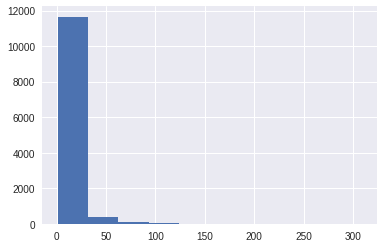

In [38]:
%matplotlib inline
plt.hist(df_train["user_id"].value_counts())

In [39]:
threshold = 1

user_for_general_model = register_count[(register_count <= threshold)].index
user_for_specific_model = register_count[(register_count > threshold)].index
print(len(user_for_general_model))
print(len(user_for_specific_model))

2685
9488


In [40]:
### select users for specific
df_train = df_train[df_train["user_id"].isin(user_for_specific_model)]
df_test = df_test[df_test["user_id"].isin(user_for_specific_model)]
df_train.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'genre_id', u'ts_listen', u'media_id',
       u'album_id', u'context_type', u'release_date', u'platform_name',
       u'platform_family', u'media_duration', u'listen_type', u'user_gender',
       u'user_id', u'artist_id', u'user_age', u'is_listened', u'text', u'year',
       u'diff_ts_listen_AND_release_date_D',
       u'diff_ts_listen_AND_release_date_M',
       u'diff_ts_listen_AND_release_date_Y', u'release_date_DAY',
       u'release_date_MONTH', u'release_date_YEAR', u'ts_listen_DAY_OF_WEEK',
       u'ts_listen_PERIOD_OF_DAY', u'user_age_group', u'diff_user_song_age',
       u'media_decade', u'artist_albuns', u'artist_fans', u'artist_radio',
       u'media_bpm', u'media_rank', u'user_id_id'],
      dtype='object')

In [41]:
to_drop = ['Unnamed: 0', 'Unnamed: 0.1']
df_train.drop(to_drop, axis = 1,inplace=True)
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,ts_listen_PERIOD_OF_DAY,user_age_group,diff_user_song_age,media_decade,artist_albuns,artist_fans,artist_radio,media_bpm,media_rank,user_id_id
0,25471,2016-12-01 11:00:15,222606,41774,12,2004-07-04 00:00:00,1,0,4.0,0,...,0,2,16.580822,7,1.0,32.0,1.0,100.1,292784.0,9241
2,16,2016-11-19 11:59:13,305197,48078,1,2014-07-14 00:00:00,2,1,2.0,1,...,0,2,26.646575,8,23.0,20022.0,1.0,90.1,309034.0,7665
3,7,2016-11-26 07:21:38,900502,71521,0,2000-10-30 00:00:00,0,0,4.0,0,...,0,2,13.915068,6,56.0,442765.0,1.0,124.9,291331.0,1580
4,7,2016-11-05 16:02:54,542335,71718,0,2008-02-15 00:00:00,0,0,3.0,0,...,1,1,15.271233,7,65.0,28423.0,1.0,120.0,406872.0,1812
5,7,2016-11-05 19:49:04,542335,71718,0,2008-02-15 00:00:00,0,0,3.0,0,...,2,1,15.271233,7,65.0,28423.0,1.0,120.0,406872.0,1812


In [42]:
#pd.set_option('display.height', 1000)
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)
#pd.set_option("precision", 2)
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,ts_listen_PERIOD_OF_DAY,user_age_group,diff_user_song_age,media_decade,artist_albuns,artist_fans,artist_radio,media_bpm,media_rank,user_id_id
0,25471,2016-12-01 11:00:15,222606,41774,12,2004-07-04 00:00:00,1,0,4.0,0,...,0,2,16.580822,7,1.0,32.0,1.0,100.1,292784.0,9241
2,16,2016-11-19 11:59:13,305197,48078,1,2014-07-14 00:00:00,2,1,2.0,1,...,0,2,26.646575,8,23.0,20022.0,1.0,90.1,309034.0,7665
3,7,2016-11-26 07:21:38,900502,71521,0,2000-10-30 00:00:00,0,0,4.0,0,...,0,2,13.915068,6,56.0,442765.0,1.0,124.9,291331.0,1580
4,7,2016-11-05 16:02:54,542335,71718,0,2008-02-15 00:00:00,0,0,3.0,0,...,1,1,15.271233,7,65.0,28423.0,1.0,120.0,406872.0,1812
5,7,2016-11-05 19:49:04,542335,71718,0,2008-02-15 00:00:00,0,0,3.0,0,...,2,1,15.271233,7,65.0,28423.0,1.0,120.0,406872.0,1812


In [43]:
# pd.isnull(df_train).sum()[pd.isnull(df_train).sum() > 0]

In [44]:
# df_train[df_train["release_date_YEAR"] == 1900][["media_id", "ts_listen"]]

In [45]:
# df_train[df_train["release_date_YEAR"] == 1900][["media_id", "ts_listen"]]

### Append User Specific

In [46]:
df_user = pd.read_csv("../data/nmidia_feats.csv", sep=";")
# pd.isnull(df_user).sum()[pd.isnull(df_user).sum() > 0]


#df_user = df_user.drop(["nmidia_with_flow_listened_PROP", "nmidia_regular_listened_PROP", "nmidia_PROP_diff"], axis=1)
df_user.fillna(0, inplace=True)

df_user["nmidia_PROP_diff"] = df_user['nmidia_with_flow_listened_PROP'] - df_user['nmidia_regular_listened_PROP']

df_user.columns.values

array(['user_id', 'nmidia_regular_listened', 'nmidia_with_flow_listened',
       'nmidia_regular', 'nmidia_with_flow',
       'nmidia_with_flow_listened_PROP', 'nmidia_regular_listened_PROP',
       'nmidia_PROP_diff'], dtype=object)

In [47]:
# x = pd.isnull(df_user).sum()
# x[x > 0]

In [48]:
df_train = pd.merge(df_train, df_user, on="user_id")
df_test = pd.merge(df_test, df_user, on="user_id")
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,media_bpm,media_rank,user_id_id,nmidia_regular_listened,nmidia_with_flow_listened,nmidia_regular,nmidia_with_flow,nmidia_with_flow_listened_PROP,nmidia_regular_listened_PROP,nmidia_PROP_diff
0,25471,2016-12-01 11:00:15,222606,41774,12,2004-07-04 00:00:00,1,0,4.0,0,...,100.1,292784.0,9241,41,48,57,71,0.676056,0.719298,-0.043242
1,7,2016-12-01 10:48:50,4301418,400118,9,2009-10-16 00:00:00,1,0,7.0,0,...,102.0,884679.0,9241,41,48,57,71,0.676056,0.719298,-0.043242
2,10,2016-11-30 11:48:22,983248,109347,0,2002-10-21 00:00:00,1,0,3.0,0,...,129.0,783895.0,9241,41,48,57,71,0.676056,0.719298,-0.043242
3,10,2016-12-01 07:18:24,983248,109347,0,2002-10-21 00:00:00,1,0,3.0,0,...,129.0,783895.0,9241,41,48,57,71,0.676056,0.719298,-0.043242
4,16,2016-11-19 11:59:13,305197,48078,1,2014-07-14 00:00:00,2,1,2.0,1,...,90.1,309034.0,7665,180,75,181,77,0.974026,0.994475,-0.020449


### Check for NA
#### Ver depois sobre o user_age_group!

In [49]:
# x = pd.isnull(df_train).sum()
# x[x > 0]

In [50]:
# df_train.dropna(inplace=True)

In [51]:
# x = pd.isnull(df_train).sum()
# x[x > 0]
# del x

In [52]:
y = df_train["is_listened"].values

In [53]:
categorical_cols = ["genre_id",
                   "media_id",
                   "album_id",
                   "context_type",
                   "release_date",
                   "platform_name",
                   "platform_family",
                   "listen_type",
                   "user_gender",
                   "user_id",
                   "artist_id",
                   "user_age"]

### Let's inspect the categorical variables!

In [54]:
for col in categorical_cols:
    print("{}: {}".format(col, len(df_train[col].unique())))

genre_id: 307
media_id: 4879
album_id: 1528
context_type: 58
release_date: 1076
platform_name: 3
platform_family: 3
listen_type: 2
user_gender: 2
user_id: 9488
artist_id: 1800
user_age: 13


### Strategy
1. Apply onehot to categorical with few classes
2. Rank categories to artist id
3. target encoder for context and genre
4. discard media, album, release date and user_id

In [55]:
from greenpyce.feature_engineering import TargetEncoder
from greenpyce.feature_engineering import onehot
from greenpyce.feature_engineering import RankCategorical
from greenpyce.feature_engineering import LabelCount

In [56]:
df_train.columns.values

array(['genre_id', 'ts_listen', 'media_id', 'album_id', 'context_type',
       'release_date', 'platform_name', 'platform_family',
       'media_duration', 'listen_type', 'user_gender', 'user_id',
       'artist_id', 'user_age', 'is_listened', 'text', 'year',
       'diff_ts_listen_AND_release_date_D',
       'diff_ts_listen_AND_release_date_M',
       'diff_ts_listen_AND_release_date_Y', 'release_date_DAY',
       'release_date_MONTH', 'release_date_YEAR', 'ts_listen_DAY_OF_WEEK',
       'ts_listen_PERIOD_OF_DAY', 'user_age_group', 'diff_user_song_age',
       'media_decade', 'artist_albuns', 'artist_fans', 'artist_radio',
       'media_bpm', 'media_rank', 'user_id_id', 'nmidia_regular_listened',
       'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow',
       'nmidia_with_flow_listened_PROP', 'nmidia_regular_listened_PROP',
       'nmidia_PROP_diff'], dtype=object)

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'genre_id', u'ts_listen', u'media_id',
       u'album_id', u'context_type', u'release_date', u'platform_name',
       u'platform_family', u'media_duration', u'listen_type', u'user_gender',
       u'user_id', u'artist_id', u'user_age', u'is_listened', u'text', u'year',
       u'diff_ts_listen_AND_release_date_D',
       u'diff_ts_listen_AND_release_date_M',
       u'diff_ts_listen_AND_release_date_Y', u'release_date_DAY',
       u'release_date_MONTH', u'release_date_YEAR', u'ts_listen_DAY_OF_WEEK',
       u'ts_listen_PERIOD_OF_DAY', u'user_age_group', u'diff_user_song_age',
       u'media_decade'],
      dtype='object')

In [57]:
cols_for_target_encoder = ["genre_id", 
                           "context_type", 
                           "user_id", 
                           "media_id", 
                           "album_id",
                           "listen_type"]

cols_for_onehot = ["platform_name", 
                   "platform_family", 
                   "user_age",
                   "artist_radio",
                   "user_age_group",
                   "media_decade",
                   "user_gender", 
                   "user_age_group", 
                   "ts_listen_DAY_OF_WEEK",
                  "ts_listen_PERIOD_OF_DAY"]

cols_for_rank = ["artist_id",
                "artist_fans"]


target = "is_listened"

In [58]:
te = TargetEncoder(cols_for_target_encoder, "is_listened")

In [59]:
te.fit(df_train)

In [60]:
te.transform(df_train)
te.transform(df_test)
del te

In [61]:
print("das")

das


In [62]:
print("teste")

teste


In [63]:
rc = RankCategorical(cols_for_rank)
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)
del rc

KeyError: 12934

In [ ]:
# rc = RankCategorical(["media_decade"])
# rc.fit(df_train)
# rc.transform(df_train)
# rc.transform(df_test)
# del rc

In [ ]:
# lc = RankCategorical(cols_for_count)
# lc.fit(df_train)
# lc.transform(df_train)
# lc.transform(df_test)

In [ ]:
df_train.head()

In [ ]:
df_train = onehot(df_train, cols_for_onehot)
df_test = onehot(df_test, cols_for_onehot)

In [ ]:
print(df_train.head())

In [ ]:
#df_train = rank_categorical(df_train, cols_for_rank)

In [ ]:
df_train.columns.values

In [ ]:
%timeit
### Drop
to_drop = ['ts_listen', 'release_date', "year", "text", 'release_date_DAY', 'release_date_MONTH']#, "nmidia_with_flow_listened_PROP", "nmidia_PROP_diff", "nmidia_regular_listened_PROP"]
df_train.drop(to_drop, axis = 1,inplace=True)
df_test.drop(to_drop, axis = 1,inplace=True)

In [ ]:
# to_drop = ["year", "text"]
# df_train.drop(to_drop, axis = 1,inplace=True)

In [ ]:
ignore_list = [target, "user_id_id"]
features = [col for col in df_train.columns.values if col not in ignore_list]
features

In [ ]:
pd.isnull(df_train).sum().values

In [ ]:
import numpy as np
np.sum(np.isinf(df_train))

In [ ]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [ ]:
print_full(pd.isnull(df_test).sum()[:])

In [ ]:
np.sum(np.isinf(df_test)).values

In [ ]:
for column in features:
    try:
        df_test[column] = df_test[column].fillna(df_train[column].mean(skipna=True))
    except:
        df_test[column] = 0

#df_test = df_test.fillna(df_train.mean(skipna=True), axis=1)
df_test = df_test.applymap(lambda x : float(x))
pd.isnull(df_test).sum().sum()

In [ ]:
np.sum(np.isinf(df_test)).values

In [ ]:
# df_train.fillna(0, inplace=True)
# df_test.fillna(0, inplace=True)

In [ ]:
# pd.isnull(df_train).sum()

In [ ]:
from sklearn.model_selection import train_test_split

In [51]:
df_for_train = df_train[!df_train.index.isin(ids_for_test)]
df_for_test = df_train[!df_train.index.isin(ids_for_test)]

X_train = 


X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)
import gc
gc.collect()

76

### Feature Selection

In [52]:
from sklearn import feature_selection
all_features = features
function_rule_selection = feature_selection.f_classif
alpha_cutoff = 0.01

selection_rule = feature_selection.SelectFdr(function_rule_selection, alpha_cutoff)
selection_rule.fit(X_train, y_train);

all_pvalues = list(filter(lambda x: pd.notnull(x[0]), zip(selection_rule.pvalues_, all_features)))
#print(all_pvalues)
filtered_pvalues = list(filter(lambda x: x[0]<=alpha_cutoff, all_pvalues))
#print(filtered_pvalues)
all_select_features = list(map(lambda x: x[1], filtered_pvalues))

print("{0} selected variables from {1}, {2:.2f}%".format(len(all_select_features), 
                                                        len(all_features), 
                                                        len(filtered_pvalues)*100/float(len(all_features))))
print(all_select_features)
#print(filtered_pvalues)

55 selected variables from 62, 88.71%
['genre_id', 'media_id', 'album_id', 'context_type', 'media_duration', 'listen_type', 'user_id', 'diff_ts_listen_AND_release_date_D', 'diff_ts_listen_AND_release_date_M', 'diff_ts_listen_AND_release_date_Y', 'release_date_YEAR', 'diff_user_song_age', 'artist_albuns', 'artist_fans', 'media_bpm', 'media_rank', 'nmidia_regular_listened', 'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow', 'nmidia_with_flow_listened_PROP', 'nmidia_regular_listened_PROP', 'nmidia_PROP_diff', 'platform_name_1', 'platform_name_2', 'platform_family_1', 'platform_family_2', 'user_age_19', 'user_age_20', 'user_age_21', 'user_age_22', 'user_age_23', 'user_age_25', 'user_age_26', 'user_age_27', 'user_age_28', 'user_age_29', 'user_age_30', 'user_age_group_1', 'user_age_group_2', 'media_decade_1', 'media_decade_2', 'media_decade_5', 'media_decade_7', 'media_decade_8', 'user_gender_1', 'user_age_group_1', 'user_age_group_2', 'ts_listen_DAY_OF_WEEK_1', 'ts_listen_DA

In [53]:
features = all_select_features
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

In [54]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def complete_report(y_test, y_pred):
    print("*********************************")
    print("Accuracy: {0:.2f}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
    print("Recall: {0}".format(metrics.recall_score(y_test, y_pred)))
    print("F1-Score: {0}".format(metrics.f1_score(y_test, y_pred)))
    conf_m = confusion_matrix(y_test, y_pred)
    print(conf_m)
    try: 
        print("Roc Area: {0}".format(metrics.roc_auc_score(y_test, y_pred))) 
        roc_curve_label(y_test, y_pred)
    except:
        print("--")
    print("*********************************")
    
    return metrics.roc_auc_score(y_test, y_pred)
        
def roc_curve_label(y_test, y_pred):
    plt.figsize=(10,6)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='RT + LR')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [55]:
# %timeit
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)

In [56]:
# print(model.score(X_test, y_test))
# complete_report(y_test, model.predict(X_test))

acc: 0.70345496362865445  
roc: 0.6912675674785278

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
# confusion_matrix(y_test, model.predict(X_test))

In [59]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.77951105798521281

*********************************
Accuracy: 0.78
Precision: 0.835649706785
Recall: 0.843236243198
F1-Score: 0.839425834001
[[307167 171348]
 [161968 871230]]
Roc Area: 0.742576712239


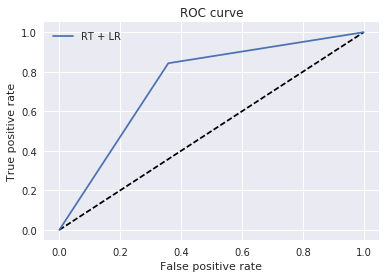

*********************************


0.74257671223894306

In [60]:
complete_report(y_test, model.predict(X_test))

0.7434

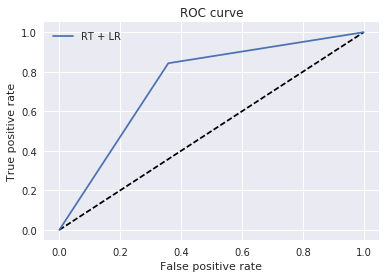

In [61]:
roc_curve_label(y_test, model.predict(X_test))

In [62]:
print(len(df_test))

19666


In [63]:
pd.isnull(df_test).sum().sum()

0

In [64]:
np.sum(np.isinf(df_test)).values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

.7411

In [65]:
df_test_group_1 = df_test#[df_test["user_id"].isin(user_for_specific_model)].copy(deep=True)
df_test_group_1["media_decade_1"] = 0
p = model.predict_proba(df_test_group_1[features])
p = p[:, 1]
df_test_group_1["prediction"] = p
df_test_group_1["prediction"].head()

0    1.0
1    0.5
2    0.7
3    0.6
4    0.8
Name: prediction, dtype: float64

In [66]:
df_test_group_1.fillna(0, inplace=True)

In [67]:
print(len(df_test))
print(len(df_test_group_1))
df_test_group_1[["prediction", "user_id_id"]]
df_test_group_1[["prediction", "user_id_id"]].to_csv("group1.csv")

19666
19666


In [68]:
import gc
gc.collect()
del df_test_group_1

In [79]:
import pandas as pd
from greenpyce.feature_engineering import TargetEncoder
from greenpyce.feature_engineering import onehot
from greenpyce.feature_engineering import RankCategorical
from greenpyce.feature_engineering import LabelCount
df_train = pd.read_csv("../data/train_data4.csv")
df_test = pd.read_csv("../data/test_data4.csv")

df_train["user_id_id"] = df_train["user_id"]
df_test["user_id_id"] = df_test["user_id"]

# df_user = pd.read_csv("../data/nmidia_feats.csv", sep=";")
# # pd.isnull(df_user).sum()[pd.isnull(df_user).sum() > 0]
# df_user = df_user.drop(["nmidia_with_flow_listened_PROP", "nmidia_regular_listened_PROP", "nmidia_PROP_diff"], axis=1)
# df_user.columns.values
# df_train = pd.merge(df_train, df_user, on="user_id")
# df_test = pd.merge(df_test, df_user, on="user_id")
# del df_user


### select users for general

#df_train = df_train[df_train["user_id"].isin(user_for_general_model)]

threshold = 1

register_count = df_train["user_id"].value_counts()

user_for_general_model = register_count[(register_count <= threshold)].index
user_for_specific_model = register_count[(register_count > threshold)].index
print(len(user_for_general_model))
print(len(user_for_specific_model))

cols_for_target_encoder = ["genre_id", 
                           "context_type", 
                           "user_id", 
                           "media_id", 
                           "artist_radio",
                           "listen_type"]

cols_for_onehot = ["platform_name", 
                   "platform_family", 
                   "user_age",
                   "user_age_group",
                   "media_decade",
                   "user_gender", 
                   "user_age_group", 
                   "ts_listen_DAY_OF_WEEK",
                  "ts_listen_PERIOD_OF_DAY"]

cols_for_rank = ["artist_id",
                "artist_fans"]


target = "is_listened"

df_test = df_test[df_test["user_id"].isin(user_for_general_model)]
df_train.columns

te = TargetEncoder(cols_for_target_encoder, "is_listened")
te.fit(df_train)
te.transform(df_train)
te.transform(df_test)
del te

rc = RankCategorical(cols_for_rank)
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)
del rc

rc = RankCategorical(["media_decade"])
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)
del rc

df_train = onehot(df_train, cols_for_onehot)
df_test = onehot(df_test, cols_for_onehot)

%timeit
### Drop
to_drop = ['ts_listen', 'album_id', 'release_date', 'artist_id', "year", "text"]#, "nmidia_with_flow_listened_PROP", "nmidia_PROP_diff", "nmidia_regular_listened_PROP"]
df_train.drop(to_drop, axis = 1,inplace=True)
df_test.drop(to_drop, axis = 1,inplace=True)

features = [col for col in df_train.columns.values if col != target]
features

252
19666


['Unnamed: 0',
 'Unnamed: 0.1',
 'genre_id',
 'media_id',
 'context_type',
 'media_duration',
 'listen_type',
 'user_id',
 'diff_ts_listen_AND_release_date_D',
 'diff_ts_listen_AND_release_date_M',
 'diff_ts_listen_AND_release_date_Y',
 'release_date_DAY',
 'release_date_MONTH',
 'release_date_YEAR',
 'diff_user_song_age',
 'artist_albuns',
 'artist_fans',
 'artist_radio',
 'media_bpm',
 'media_rank',
 'user_id_id',
 'platform_name_1',
 'platform_name_2',
 'platform_family_1',
 'platform_family_2',
 'user_age_19',
 'user_age_20',
 'user_age_21',
 'user_age_22',
 'user_age_23',
 'user_age_24',
 'user_age_25',
 'user_age_26',
 'user_age_27',
 'user_age_28',
 'user_age_29',
 'user_age_30',
 'user_age_group_1',
 'user_age_group_2',
 'media_decade_2',
 'media_decade_3',
 'media_decade_4',
 'media_decade_5',
 'media_decade_6',
 'media_decade_7',
 'media_decade_8',
 'media_decade_9',
 'user_gender_1',
 'user_age_group_1',
 'user_age_group_2',
 'ts_listen_DAY_OF_WEEK_1',
 'ts_listen_DAY_OF_WEE

In [80]:
features

['Unnamed: 0',
 'Unnamed: 0.1',
 'genre_id',
 'media_id',
 'context_type',
 'media_duration',
 'listen_type',
 'user_id',
 'diff_ts_listen_AND_release_date_D',
 'diff_ts_listen_AND_release_date_M',
 'diff_ts_listen_AND_release_date_Y',
 'release_date_DAY',
 'release_date_MONTH',
 'release_date_YEAR',
 'diff_user_song_age',
 'artist_albuns',
 'artist_fans',
 'artist_radio',
 'media_bpm',
 'media_rank',
 'user_id_id',
 'platform_name_1',
 'platform_name_2',
 'platform_family_1',
 'platform_family_2',
 'user_age_19',
 'user_age_20',
 'user_age_21',
 'user_age_22',
 'user_age_23',
 'user_age_24',
 'user_age_25',
 'user_age_26',
 'user_age_27',
 'user_age_28',
 'user_age_29',
 'user_age_30',
 'user_age_group_1',
 'user_age_group_2',
 'media_decade_2',
 'media_decade_3',
 'media_decade_4',
 'media_decade_5',
 'media_decade_6',
 'media_decade_7',
 'media_decade_8',
 'media_decade_9',
 'user_gender_1',
 'user_age_group_1',
 'user_age_group_2',
 'ts_listen_DAY_OF_WEEK_1',
 'ts_listen_DAY_OF_WEE

In [81]:
len(df_test)

252

In [108]:
features =['genre_id', 
           'media_id', 
           'context_type', 
    #       'media_duration', 
           'listen_type', 
    #       'user_id', 
   #        'diff_ts_listen_AND_release_date_D', 
           'diff_ts_listen_AND_release_date_M', 
   #        'diff_ts_listen_AND_release_date_Y', 
    #       'release_date_YEAR', 
           'diff_user_song_age', 
           'artist_albuns', 
           'artist_fans', 
           'artist_radio', 
           'media_bpm', 
           'media_rank', 
           #'user_id_id', 
#            'nmidia_regular_listened', 
#            'nmidia_with_flow_listened', 
#            'nmidia_regular', 
#            'nmidia_with_flow', 
           'platform_name_1', 
           'platform_name_2', 
           'platform_family_1', 
           'platform_family_2', 
           'user_age_19', 
           'user_age_20', 
           'user_age_21', 
           'user_age_22', 
           'user_age_23', 
           'user_age_25', 
           'user_age_26', 
           'user_age_27', 
           'user_age_28', 
           'user_age_29', 
           'user_age_30', 
           'user_age_group_1',
           'user_age_group_2', 
#            'media_decade_1', 
           'media_decade_2',
           'media_decade_5', 
           'media_decade_7', 
           'media_decade_8', 
           'user_gender_1', 
           'user_age_group_1', 
           'user_age_group_2', 
           'ts_listen_DAY_OF_WEEK_1',
           'ts_listen_DAY_OF_WEEK_2', 
           'ts_listen_DAY_OF_WEEK_3', 
           'ts_listen_DAY_OF_WEEK_4', 
           'ts_listen_DAY_OF_WEEK_5',
           'ts_listen_PERIOD_OF_DAY_2', 
           'ts_listen_PERIOD_OF_DAY_3']

['genre_id', 'media_id', 'context_type', 'media_duration', 'listen_type', 'user_id', 'diff_ts_listen_AND_release_date_D', 'diff_ts_listen_AND_release_date_M', 'diff_ts_listen_AND_release_date_Y', 'release_date_YEAR', 'diff_user_song_age', 'artist_albuns', 'artist_fans', 'artist_radio', 'media_bpm', 'media_rank', 'user_id_id', 'nmidia_regular_listened', 'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow', 'platform_name_1', 'platform_name_2', 'platform_family_1', 'platform_family_2', 'user_age_19', 'user_age_20', 'user_age_21', 'user_age_22', 'user_age_23', 'user_age_25', 'user_age_26', 'user_age_27', 'user_age_28', 'user_age_29', 'user_age_30', 'user_age_group_1', 'user_age_group_2', 'media_decade_1', 'media_decade_2', 'media_decade_5', 'media_decade_7', 'media_decade_8', 'user_gender_1', 'user_age_group_1', 'user_age_group_2', 'ts_listen_DAY_OF_WEEK_1', 'ts_listen_DAY_OF_WEEK_2', 'ts_listen_DAY_OF_WEEK_3', 'ts_listen_DAY_OF_WEEK_4', 'ts_listen_DAY_OF_WEEK_5', 'ts_listen_PERIOD_OF_DAY_2', 'ts_listen_PERIOD_OF_DAY_3']

In [109]:
### 0.7678

for column in features:
    try:
        df_test[column] = df_test[column].fillna(df_train[column].mean(skipna=True))
    except:
        df_test[column] = 0

#df_test = df_test.fillna(df_train.mean(skipna=True), axis=1)
df_test = df_test.applymap(lambda x : float(x))
pd.isnull(df_test).sum().sum()

ValueError: ('invalid literal for float(): 2016-11-02 14:32:51', u'occurred at index ts_listen')

In [ ]:
# df_test = df_test.fillna(df_train.mean(skipna=True).to_dict, axis=1)#.dropna(axis=1, how='all')
# pd.isnull(df_test).sum()
# df_train.mean(skipna=True).to_dict

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

from sklearn import feature_selection
all_features = features
function_rule_selection = feature_selection.f_classif
alpha_cutoff = 0.001

selection_rule = feature_selection.SelectFdr(function_rule_selection, alpha_cutoff)
selection_rule.fit(X_train, y_train);

all_pvalues = list(filter(lambda x: pd.notnull(x[0]), zip(selection_rule.pvalues_, all_features)))
#print(all_pvalues)
filtered_pvalues = list(filter(lambda x: x[0]<=alpha_cutoff, all_pvalues))
#print(filtered_pvalues)
all_select_features = list(map(lambda x: x[1], filtered_pvalues))

print("{0} selected variables from {1}, {2:.2f}%".format(len(all_select_features), 
                                                        len(all_features), 
                                                        len(filtered_pvalues)*100/float(len(all_features))))
print(all_select_features)
#print(filtered_pvalues)

features = all_select_features
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

41 selected variables from 47, 87.23%
['genre_id', 'media_id', 'context_type', 'media_duration', 'listen_type', 'user_id', 'diff_ts_listen_AND_release_date_D', 'diff_ts_listen_AND_release_date_M', 'diff_ts_listen_AND_release_date_Y', 'release_date_YEAR', 'diff_user_song_age', 'artist_albuns', 'artist_fans', 'media_bpm', 'media_rank', 'platform_name_1', 'platform_name_2', 'platform_family_1', 'platform_family_2', 'user_age_19', 'user_age_20', 'user_age_21', 'user_age_22', 'user_age_23', 'user_age_25', 'user_age_26', 'user_age_27', 'user_age_28', 'user_age_29', 'user_age_30', 'user_age_group_1', 'user_age_group_2', 'media_decade_2', 'media_decade_5', 'media_decade_7', 'user_age_group_2', 'ts_listen_DAY_OF_WEEK_1', 'ts_listen_DAY_OF_WEEK_2', 'ts_listen_DAY_OF_WEEK_3', 'ts_listen_DAY_OF_WEEK_4', 'ts_listen_DAY_OF_WEEK_5']


In [86]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.76027475187926152

In [87]:
df_test_group_2 = df_test #[df_test["user_id"].isin(user_for_general_model)].copy(deep=True)
df_test_group_2["media_decade_7"] = 0
p = model.predict_proba(df_test_group_2[features])
p = p[:, 1]
df_test_group_2["prediction"] = p
df_test_group_2["prediction"].head()

140    0.9
266    0.6
321    0.9
326    0.1
363    0.9
Name: prediction, dtype: float64

In [88]:
df_test_group_2[["user_id_id", "prediction"]].to_csv("group2.csv")

In [89]:
df_test_group_1 = pd.read_csv("group1.csv", index_col="user_id_id")
df_test_group_2 = pd.read_csv("group2.csv", index_col="user_id_id")

In [90]:
df_test = pd.read_csv("../data/test_data4.csv")
#df_test = df_test["user_id"]
#df_test["user_id_id"] = df_test["user_id"]
# df_test = pd.merge(df_test, df_test_group_1[["user_id", "prediction"]], on="user_id")
# df_test = pd.merge(df_test, df_test_group_2[["user_id", "prediction"]], on="user_id")
df_test = pd.merge(df_test, df_test_group_1[["prediction"]], left_on="user_id", right_index=True, how="outer")
#df_test.join(df_test_group_2[["prediction"]])
df_test = pd.merge(df_test, df_test_group_2[["prediction"]], left_on="user_id", right_index=True, how="outer")

In [91]:
print(len(df_test_group_1))
print(len(df_test_group_2))
print(len(df_test))

19666
252
19918


In [92]:
#pd.set_option("precision", 10)
#df_test_group_2[["user_id", "prediction"]].head()
a = pd.read_csv("../data/test_data4.csv")

In [93]:
a["user_id"].head()

0    17698
1    10525
2     8716
3     5443
4     7600
Name: user_id, dtype: int64

In [94]:
df_test.head()

,Unnamed: 0,Unnamed: 0.1,sample_id,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,...,user_age_group,diff_user_song_age,media_decade,media_bpm,media_rank,artist_albuns,artist_fans,artist_radio,prediction_x,prediction_y
0,0,0,0,50,2016-11-02 14:32:51,683078,82356,1,2002-10-08 00:00:00,0,...,2,15.920548,7,181.0,293191.0,25.0,31649.0,1.0,1.0,NaN
1,1,1,1,2744,2016-11-16 15:25:40,876497,99692,1,1985-12-31 00:00:00,0,...,2,-2.898630,5,88.0,743839.0,10.0,585650.0,1.0,0.5,NaN
2,2,2,2,2744,2016-11-19 07:06:01,876497,99692,1,1985-12-31 00:00:00,0,...,2,-3.906849,5,88.0,743839.0,10.0,585650.0,1.0,0.7,NaN
3,3,3,3,2744,2016-11-06 16:42:09,876500,99692,1,1985-12-31 00:00:00,2,...,2,-0.871233,5,107.0,630042.0,10.0,585650.0,1.0,0.6,NaN
4,4,4,4,2744,2016-11-29 17:42:40,876504,99692,1,1985-12-31 00:00:00,2,...,2,-1.934247,5,110.0,372256.0,10.0,585650.0,1.0,0.8,NaN


In [95]:
df_test["prediction_x"].fillna(0, inplace=True)
df_test["prediction_y"].fillna(0, inplace=True)
df_test["prediction"] = df_test["prediction_x"] + df_test["prediction_y"]

In [96]:
df_test["prediction"].head()

0    1.0
1    0.5
2    0.7
3    0.6
4    0.8
Name: prediction, dtype: float64

In [97]:
df_test.ix[8716]["prediction"]

0.90000000000000002

In [98]:
df_test["prediction"].values[:5]

array([ 1. ,  0.5,  0.7,  0.6,  0.8])

In [99]:
len(df_test)

19918

In [100]:
(df_test["prediction"] > 1.0).sum()

0

In [101]:
pd.isnull(df_test["prediction_y"]).sum()

0

In [102]:
#df_test["prediction"] = df_test["prediction"].apply(lambda x : 1 if x > 1 else x)

In [103]:
import gzip
import csv
import numpy as np

def build_kaggle_submission(preds, filename="my_submission"):
    """
    Build a compressed Kaggle Submission
    
    preds: array with predictions
    """
    with gzip.open(filename + '.csv.gz', 'wt') as outf:
        fo = csv.writer(outf, lineterminator='\n')
        fo.writerow(["sample_id", "is_listened"])       
        for i, pred in enumerate(preds):
            fo.writerow([i, pred])

In [104]:
#p = model.predict_proba(df_test[features])
#p = p[:, 1]
p = df_test["prediction"].values

In [105]:
build_kaggle_submission(p, "note12_3")

In [106]:
import sys
print(sys.getsizeof(df_train) / 1e6)
print(sys.getsizeof(df_test) / 1e6)
print(sys.getsizeof(model) / 1e6)

1617.586942
9.560672
6.4e-05


In [107]:
!ls

0-EDA.ipynb
10 - XGBoost + Threshold + data_4.ipynb
11 - XGBoost + Two Models | Data4.ipynb
12 - Simple Model + Threshold + Feat_Eng | data4.ipynb
1 - First Model.ipynb
2_models_user_groups.csv.gz
2 - Simple Model + Features.ipynb
3 - Simple Model + User Specific.ipynb
4 - XGBoost + User Specific.ipynb
5 - XGBoost + Feature Selection.ipynb
6 - Simple Model + User Specific + Some fixes.ipynb
7 - Simple Model + User Specific + 2 models-Copy1.ipynb
7 - Simple Model + User Specific + 2 models.ipynb
8 - Deezer_API_features.ipynb
8 - Simple Model + User Specific + 2 models thresholds.ipynb
9 - Simple Model + Threshold + data_4.ipynb
Construindo Funcoes pro DataGame.ipynb
Feature Engineering.ipynb
Feature Engineering - User Specific.ipynb
features.py
group1.csv
group2.csv
img
nmidia_feats.csv
note12_1.csv.gz
note12_2.csv.gz
note12_3.csv.gz
__pycache__
qtd_musicas_diferentes_flow_noflow.csv
rand_2m_data4_2.csv.gz
rand_2m_data4.csv.gz
rand_2_models.csv.gz
rand_2_models_fix.csv.gz
rand_2_models_